In [2]:
pip install pandas


[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Survey Text Preferences: Exploring Tone Patterns

In [4]:
import pandas as pd
import re

In [5]:
df = pd.read_excel('Datasets/FoodInsecurity_Hispanic_Demographics_Tone_Preferences_Dataset.xlsx')
df.head(3)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,states,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,indiana,Persuasive,Simplier,Empathetic,Persuasive,Original,Original,Persuasive,Original
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,illinois,Original,Simplier,Empathetic,Simplier,Simplier,Original,Original,Persuasive
2,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,i do not have a disability,new York,Original,Original,Simplier,Simplier,Empathetic,Empathetic,Empathetic,Simplier


In [24]:
df.columns

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'states', 'sample_1',
       'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
       'sample_8'],
      dtype='object')

In [25]:
demographics = df[['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'states']]
demographics.head(3)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,states
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,indiana
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,illinois
2,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,i do not have a disability,new York


In [26]:
tones = df[['sample_1',
       'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
       'sample_8']]

In [27]:
tones.head(3)

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8
0,Persuasive,Simplier,Empathetic,Persuasive,Original,Original,Persuasive,Original
1,Original,Simplier,Empathetic,Simplier,Simplier,Original,Original,Persuasive
2,Original,Original,Simplier,Simplier,Empathetic,Empathetic,Empathetic,Simplier


In [30]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()
tones['sample_1'] = encoder.fit_transform(tones['sample_1'])
tones['sample_2'] = encoder.fit_transform(tones['sample_2'])
tones['sample_3'] = encoder.fit_transform(tones['sample_3'])
tones['sample_4'] = encoder.fit_transform(tones['sample_4'])
tones['sample_5'] = encoder.fit_transform(tones['sample_5'])
tones['sample_6'] = encoder.fit_transform(tones['sample_6'])
tones['sample_7'] = encoder.fit_transform(tones['sample_7'])
tones['sample_8'] = encoder.fit_transform(tones['sample_8'])

C:\Users\Owner\AppData\Local\Temp\ipykernel_9904\1715418131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tones['sample_1'] = encoder.fit_transform(tones['sample_1'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_9904\1715418131.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tones['sample_2'] = encoder.fit_transform(tones['sample_2'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_9904\1715418131.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [31]:
tones['sample_1']

0     2
1     1
2     1
3     0
4     0
5     1
6     0
7     1
8     1
9     0
10    3
11    0
12    3
13    0
14    1
15    1
16    3
17    3
18    2
19    0
20    3
21    3
22    3
23    1
24    2
25    1
26    0
27    3
28    0
29    1
30    1
31    0
32    0
33    0
34    2
35    2
36    2
37    3
38    0
39    3
40    0
41    0
42    1
43    3
44    3
45    3
46    2
47    0
48    1
49    2
Name: sample_1, dtype: int32

In [33]:
tones.head(3)

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8
0,2,3,0,2,1,1,2,1
1,1,3,0,3,3,1,1,2
2,1,1,3,3,0,0,0,3


In [36]:
encoder.classes_

array(['Empathetic', 'Original', 'Persuasive', 'Simplier'], dtype=object)

In [37]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

# Import the necessary libraries

# Define the number of clusters
num_clusters = 4

# Create an instance of the KMeans model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the data
kmeans.fit(tones)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Print the cluster labels and centers
print("Cluster Labels:", labels)
print("Cluster Centers:", centers)

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Labels: [3 0 2 3 1 3 2 0 2 2 1 0 1 0 1 3 2 1 1 0 1 2 1 3 3 0 2 1 3 0 1 3 3 0 1 3 1
 0 0 1 1 1 2 1 2 3 2 0 2 0]
Cluster Centers: [[0.75       2.         0.58333333 0.91666667 2.75       1.91666667
  2.         2.08333333]
 [2.         1.875      1.6875     1.1875     1.5625     1.0625
  0.125      1.3125    ]
 [1.36363636 0.18181818 1.90909091 1.72727273 0.54545455 1.63636364
  1.         2.45454545]
 [1.09090909 1.72727273 0.63636364 2.27272727 1.09090909 0.90909091
  2.45454545 0.72727273]]


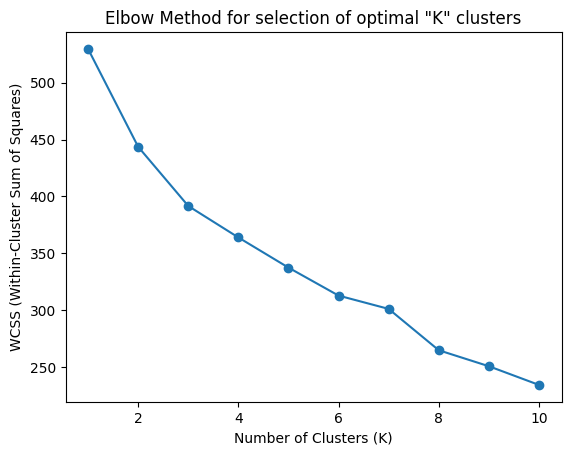

In [38]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(tones)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for selection of optimal "K" clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.savefig('main/PCA_elbow_method.png')
plt.show()

In [41]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
# Assuming 'tones' is the dataset
pca = PCA(n_components=2)
tones_pca = pca.fit_transform(tones)

# Access the principal components
principal_components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [42]:
pca

PCA(n_components=2)

In [43]:
tones_pca

array([[ 1.006453  , -1.10331355],
       [ 1.33126095, -1.39007976],
       [-2.27856098,  1.18740835],
       [ 0.97242092,  0.31289382],
       [ 0.39418201, -0.52219858],
       [ 0.81999213, -0.41584195],
       [-1.16056765,  2.71137049],
       [ 1.49665623, -0.89180755],
       [-1.32107964,  0.47985281],
       [ 0.14629373,  1.76367281],
       [-1.22905374,  1.09008645],
       [ 1.35690198, -1.49961426],
       [-3.38570877, -1.04141253],
       [ 1.21918504, -0.37186317],
       [-1.01680188,  0.8777057 ],
       [ 1.60351091, -0.91210227],
       [-1.0591919 , -0.86571399],
       [-0.36755634, -1.29377539],
       [-0.93242411, -0.74484847],
       [ 3.56262839, -0.2970635 ],
       [-2.28238199, -1.90167154],
       [-3.07928494,  0.78726781],
       [-1.33588825, -0.3737854 ],
       [ 1.69777053,  0.54662804],
       [ 2.10071215, -0.71366969],
       [ 1.20188016,  0.20772243],
       [ 0.30202203,  0.41743718],
       [-2.40803751, -0.48675744],
       [ 1.20887501,

In [44]:
principal_components

array([[-0.47269183,  0.21496664, -0.44094877,  0.12557692,  0.28404255,
         0.16336882,  0.59205795, -0.24948794],
       [-0.35213594, -0.5085306 ,  0.41988985,  0.3386728 , -0.33662344,
         0.40478488,  0.1139788 , -0.19034928]])

For n_clusters = 2, the average silhouette score is: 0.38023127650247424
For n_clusters = 3, the average silhouette score is: 0.38237535479056783
For n_clusters = 4, the average silhouette score is: 0.37454239317923377
For n_clusters = 5, the average silhouette score is: 0.35328168705160456
For n_clusters = 6, the average silhouette score is: 0.3335521580013947
For n_clusters = 7, the average silhouette score is: 0.33486742750340776
For n_clusters = 8, the average silhouette score is: 0.3119280508940319
For n_clusters = 9, the average silhouette score is: 0.296618525644081
For n_clusters = 10, the average silhouette score is: 0.2939372705007607
For n_clusters = 11, the average silhouette score is: 0.32677756112471834


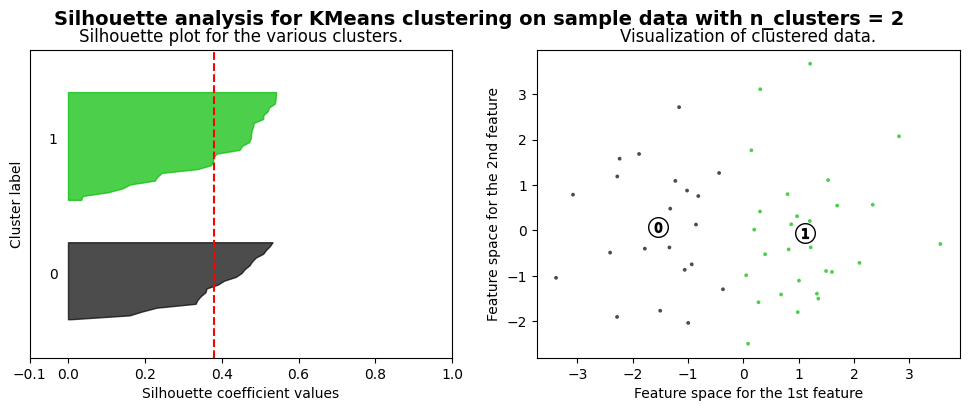

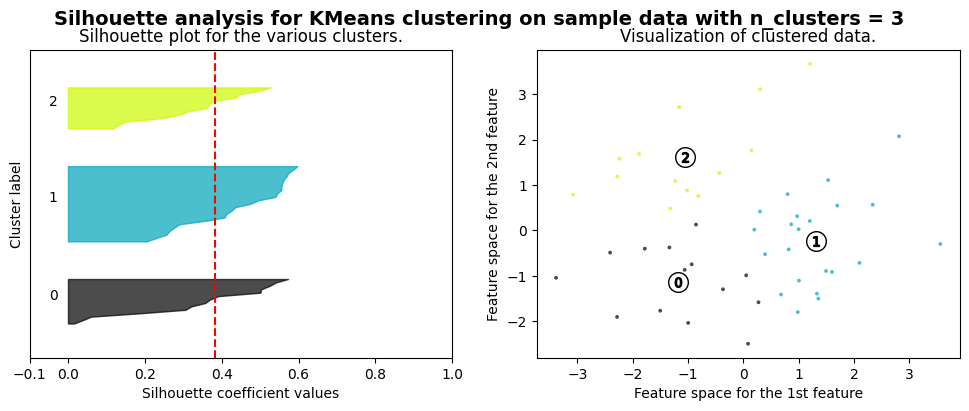

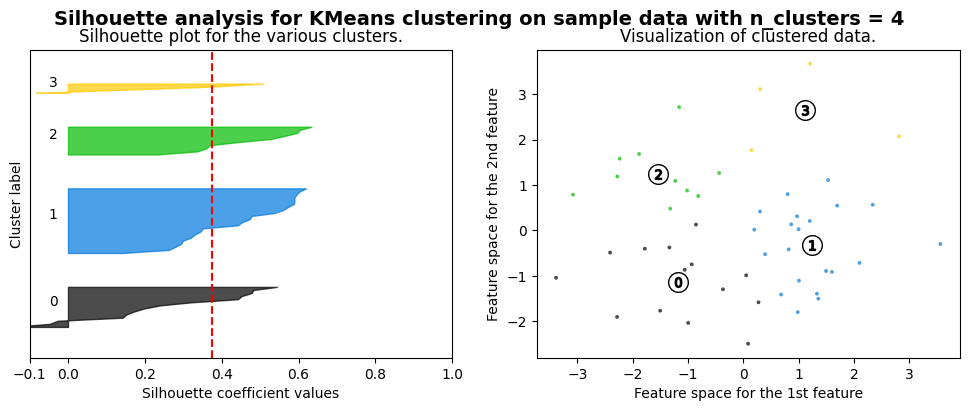

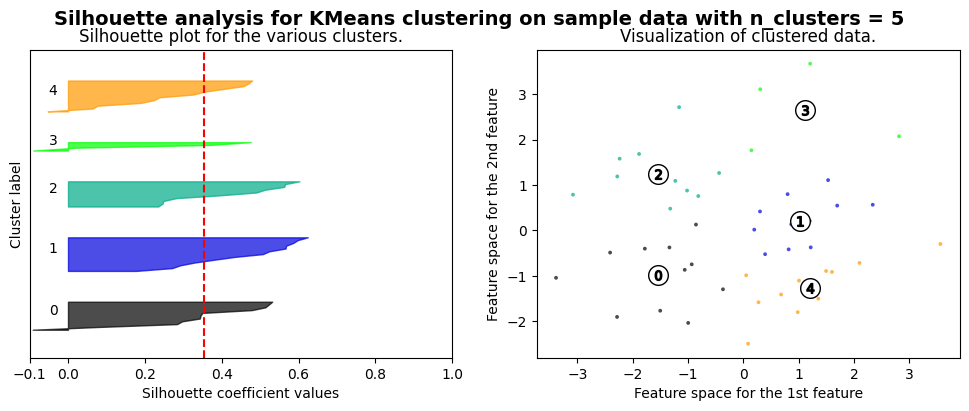

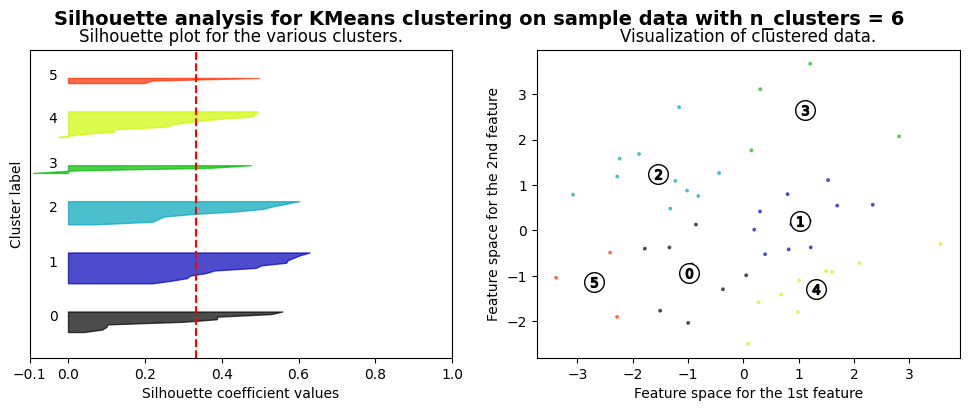

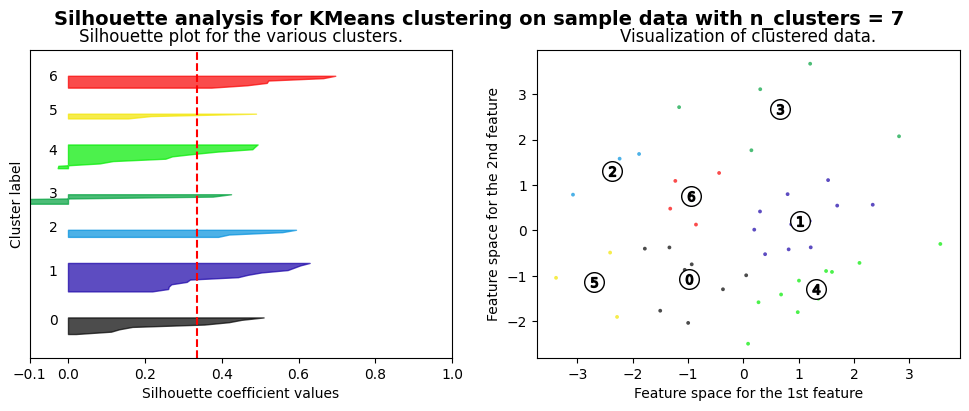

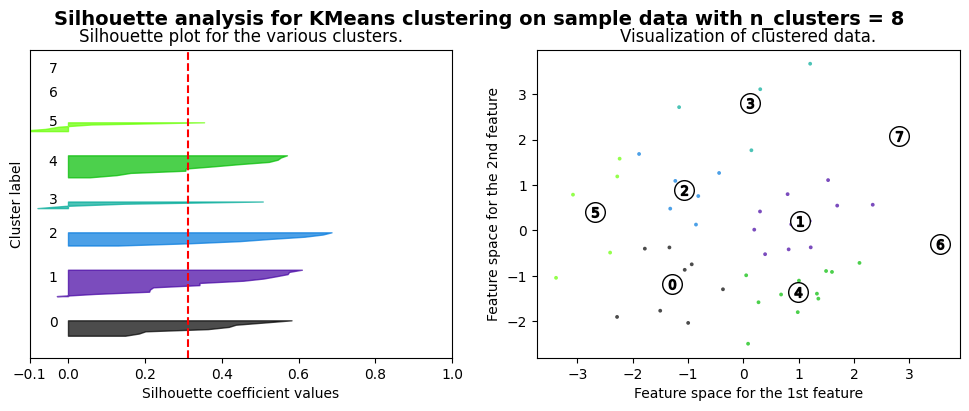

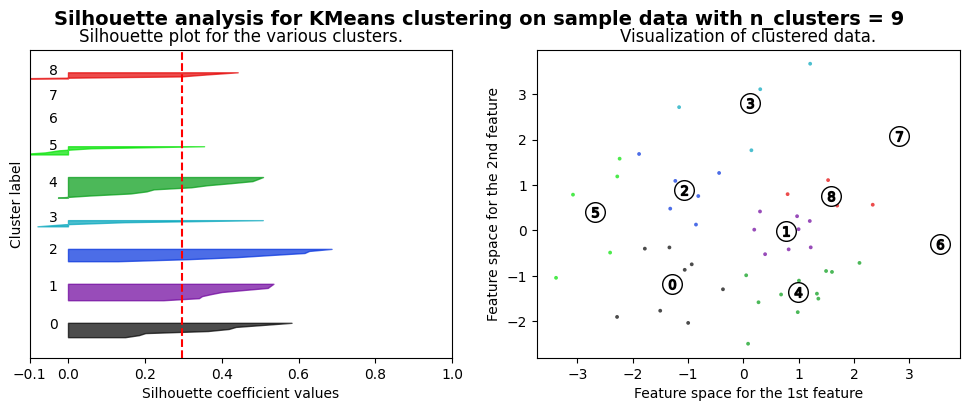

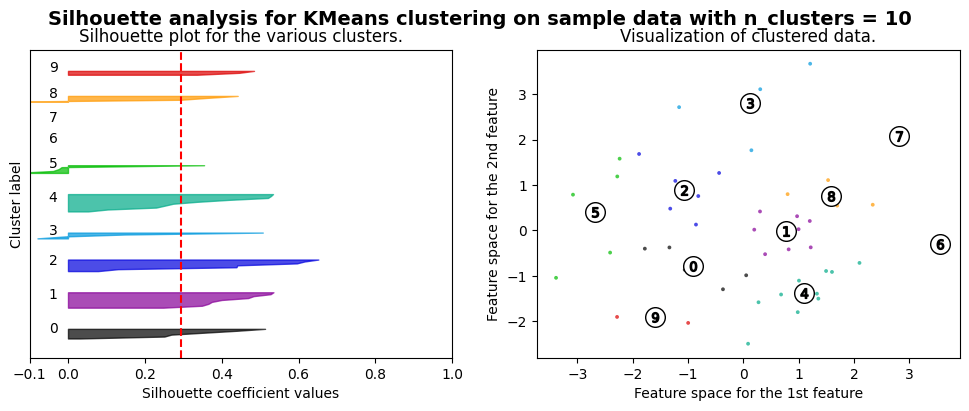

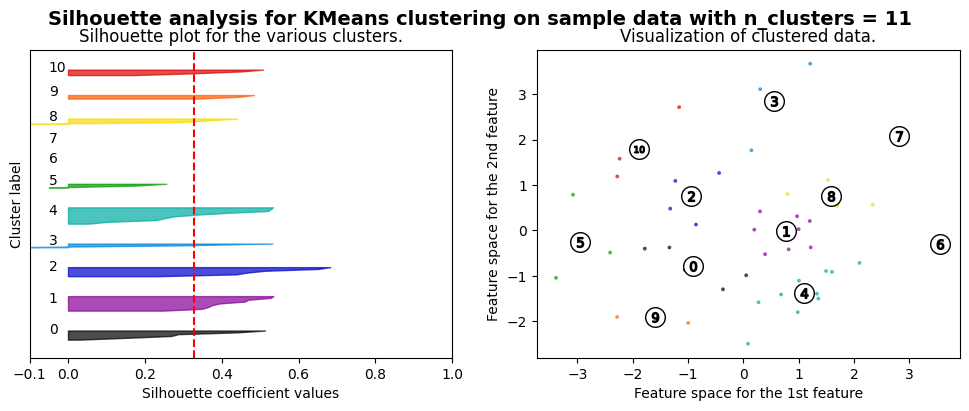

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score

import os

output_dir = 'main/'
os.makedirs(output_dir, exist_ok=True)

# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10,11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(tones_pca) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(tones_pca)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(tones_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tones_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(tones_pca[:, 0], tones_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

In [6]:
df.columns

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'states', 'sample_1',
       'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
       'sample_8'],
      dtype='object')

In [7]:
df.shape

(50, 19)

In [8]:
print(df.columns)
print(df.shape)
print('na value count', df.isna().sum().sum())

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'states', 'sample_1',
       'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
       'sample_8'],
      dtype='object')
(50, 19)
na value count 2


In [9]:
melted_data = df.copy()

keep_columns = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status', 'income', 'employment', 'language', 'disability']

melted_data = pd.melt(melted_data, id_vars=keep_columns, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],var_name='sample_number', value_name='choice')

melted_data['sample_number'] = melted_data['sample_number'].str.split('_').str[1].astype(int)

sample_numbers = pd.DataFrame({'sample_number': range(1, 9)})

final_data = melted_data.merge(sample_numbers, on='sample_number')

final_data = final_data.drop('sample_number', axis=1)
# final_data.drop(['race', 'language', 'marital_status'], axis=1, inplace=True)
final_data.head(3)


,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,choice
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,Persuasive
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,Original
2,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,i do not have a disability,Original


In [10]:
def clean_text(text):
    if pd.isna(text) or str(text).strip().lower() == 'na' or not str(text).strip():
        cleaned_text = 'undisclosed'
    else:
        pattern = r'[^a-zA-Z0-9\s]'  # Keep letters, numbers, and spaces
        cleaned_text = re.sub(pattern, '', str(text))
    return cleaned_text
def clean_income(income):
    if income.strip().lower() == 'na' or not income.strip():
        cleaned_income = 'undisclosed'
    else:
        cleaned_income = re.sub(r'[,$]', '', income)  # Remove commas and dollar signs
    return cleaned_income
    

In [11]:
final_data.loc[:, 'ethnicity'] = final_data['ethnicity'].apply(clean_text)
final_data.loc[:, 'gender'] = final_data['gender'].apply(clean_text)
final_data.loc[:, 'race'] = final_data['race'].apply(clean_text)
final_data.loc[:, 'education'] = final_data['education'].apply(clean_text)
final_data.loc[:, 'marital_status'] = final_data['marital_status'].apply(clean_text)
final_data.loc[:, 'employment'] = final_data['employment'].apply(clean_text)
final_data.loc[:, 'language'] = final_data['language'].apply(clean_text)
final_data.loc[:, 'disability'] = final_data['disability'].apply(clean_text)
final_data.loc[:, 'income'] = final_data['income'].apply(clean_income)

In [12]:
final_data.head(5)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,choice
0,45-54,female,non hispanic,native american,High School,undisclosed,25000 - 49999,Employed Part time,both,i do not have a disability,Persuasive
1,18-24,male,hispanic,white,High School,single,Less than 25000,Employed Part time,english,i do not have a disability,Original
2,25-34,female,non hispanic,multiracial,Associate,single,Less than 25000,Student,english,i do not have a disability,Original
3,25-34,female,hispanic,undisclosed,Associate,single,Less than 25000,Employed Part time,both,i do not have a disability,Empathetic
4,18-24,male,hispanic,native american,Bachelor,single,25000 - 49999,Student,both,undisclosed,Empathetic


In [13]:
# Download the file below to combine with the cluster labels and use for analysis
# final_data.to_excel('Datasets/Dataset_w_labels.xlsx', index=False)

In [14]:
def encode_income(income_category):
    income_encoding = {
        'Less than 25000': 0,
        '25000 - 49999': 1,
        '50000 - 74999': 2,
        '75000 - 99999': 3,
        '100000 - 149999': 4,
        '150000 or more': 5,
        'prefer not to say': 6
    }
    
    return income_encoding.get(income_category, -1)


def encode_age(age_group):
    age_encoding = {
        '18-24': 0,
        '25-34': 1,
        '35-44': 2,
        '45-54': 3,
        '55-64': 4,
        '65 and above': 5,
        'Prefer not to say': 6
    }
    
    return age_encoding.get(age_group, -1)

def encode_ethnicity(text):
    eth_encoding = {
        'hispanic': 1,
        'non hispanic': 0,
        'undisclosed': -1,
    }
    
    return eth_encoding.get(text, -1)

def encode_dis(text):
    dis_encoding = {
        'i have a disability': 1,
        'i do not have a disability': 0,
        'undisclosed': -1,
    }
    
    return dis_encoding.get(text, -1)


In [15]:
final_data['income'] = final_data['income'].apply(encode_income)
final_data['age'] = final_data['age'].apply(encode_age)
# final_data['ethnicity'] = final_data['ethnicity'].apply(encode_ethnicity)
# final_data['disability'] = final_data['disability'].apply(encode_dis)

In [16]:
final_data.head(15)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,choice
0,3,female,non hispanic,native american,High School,undisclosed,1,Employed Part time,both,i do not have a disability,Persuasive
1,0,male,hispanic,white,High School,single,0,Employed Part time,english,i do not have a disability,Original
2,1,female,non hispanic,multiracial,Associate,single,0,Student,english,i do not have a disability,Original
3,1,female,hispanic,undisclosed,Associate,single,0,Employed Part time,both,i do not have a disability,Empathetic
4,0,male,hispanic,native american,Bachelor,single,1,Student,both,undisclosed,Empathetic
5,1,female,non hispanic,white,Master,married,2,Employed Part time,english,i do not have a disability,Original
6,0,female,hispanic,white,Associate,single,-1,Student,both,i do not have a disability,Empathetic
7,1,non binary,hispanic,Puerto Rican,Associate,divorced,2,Employed Part time,both,undisclosed,Original
8,1,female,hispanic,undisclosed,Bachelor,single,0,Student,both,i do not have a disability,Original
9,1,female,hispanic,undisclosed,Associate,single,4,Student,both,i do not have a disability,Empathetic


In [17]:
data = final_data.copy()

In [18]:
final_data.to_excel('Datasets/Dataset_K_prototypes.xlsx', index=False)

In [19]:
encoded_data = pd.get_dummies(final_data)

In [20]:
# encoded_data.to_excel('Datasets/Encoded_Data_for_Model_Training.xlsx', index=False)
# encoded_data.to_excel('Datasets/Encoded_Data_for_Model_Training_2.xlsx', index=False)
# encoded_data.to_excel('Datasets/Encoded_Data_for_Model_Training_short.xlsx', index=False)
encoded_data.to_excel('Datasets/Encoded_Data_for_Model_Training_long.xlsx', index=False)

## Hierarchical Clustering

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


### Test Model w/ different distances on Agglomerative clustering

In [22]:
from sklearn import preprocessing
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn import datasets




distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Iterate over each distance metric
for metric in distance_metrics:
    # Initialize agglomerative clustering model with the appropriate linkage method
    if metric == 'euclidean':
        linkage_method = 'ward'  # For Euclidean distance, use 'ward' linkage
    elif metric == 'manhattan':
        linkage_method = 'average'  # For Manhattan distance, use 'average' linkage
    else:
        linkage_method = 'average'  # For Cosine similarity, use 'average' linkage
        
    model = AgglomerativeClustering(n_clusters=3, affinity=metric, linkage=linkage_method)
    
    # Fit the model to the data
    clusters = model.fit_predict(encoded_data)
    
    # Evaluate clustering performance
    silhouette = silhouette_score(encoded_data, clusters)
    
    print(f"Clustering with {metric} metric has silhouette score: {silhouette}")

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clustering with euclidean metric has silhouette score: 0.19697039633923197
Clustering with manhattan metric has silhouette score: 0.1122822983194823
Clustering with cosine metric has silhouette score: 0.12795365499084027


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


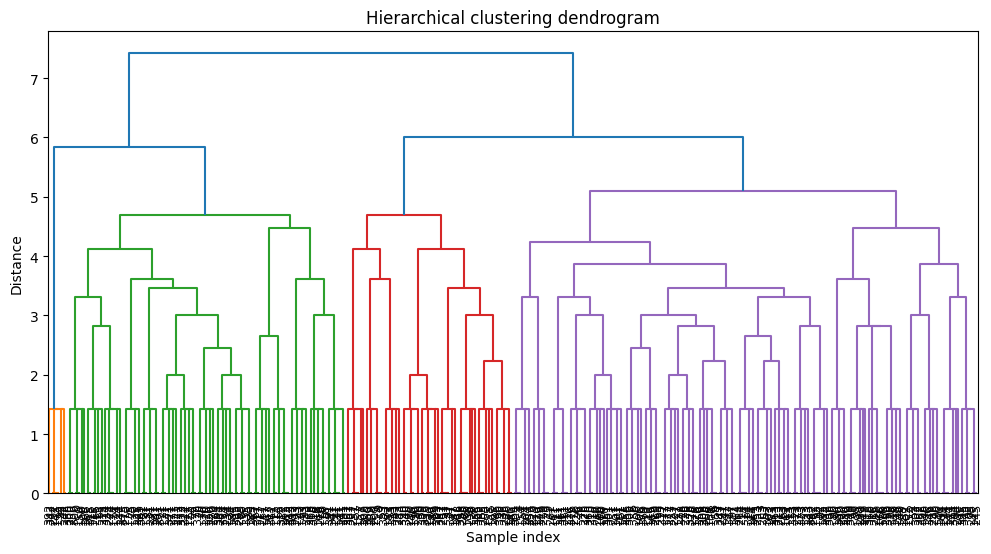

In [23]:
# model
model = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='euclidean')
clusters = model.fit_predict(encoded_data)

# linkage matrix
linkage_matrix = linkage(encoded_data, method='complete')  # Use 'average' method

# plot dendrogram
plt.figure(figsize=(12, 6))
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Hierarchical clustering dendrogram')
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
plt.savefig('Visualizations/dendrogram.png')
plt.show()
